# Single system
## Classical information
If $X$ is a bit, then $\sum = \{ 0,1\}$, if $Pr(X = 0) = \frac{3}{4} and Pr(X=1)=\frac{1}{4}$, we can write
$$\left(\begin{matrix}
\frac{3}{4} \\
\frac{1}{4} \\
\end{matrix}
\right)$$
there is 
$$\left(\begin{matrix}
\frac{3}{4} \\
\frac{1}{4} \\
\end{matrix}
\right) = \frac{3}{4} \left | 0 \right \rangle + \frac{1}{4} \left | 1 \right \rangle $$
$$M|a\rangle = |f(a)\rangle$$
$$M = \sum_{a\in \Sigma}|f(a)\rangle \langle a |$$

# Quantum information
most of this part has discussed in Inroduction.
A square maxtrix $U$ having complex number entries is unitary:
$$ U U^\dagger = \mathbb{1} $$
$$U^\dagger = \bar{U^T}$$
# Basic Qiskit examples

In [2]:
from qiskit.quantum_info import Statevector
v = Statevector([(1+2.j)/3, -2/3])
display(v.draw('latex'))

<IPython.core.display.Latex object>

In [3]:
display(v.is_valid())

True

In [4]:
v.measure()

('1',
 Statevector([ 0.+0.j, -1.+0.j],
             dims=(2,)))

{'0': 560, '1': 440}

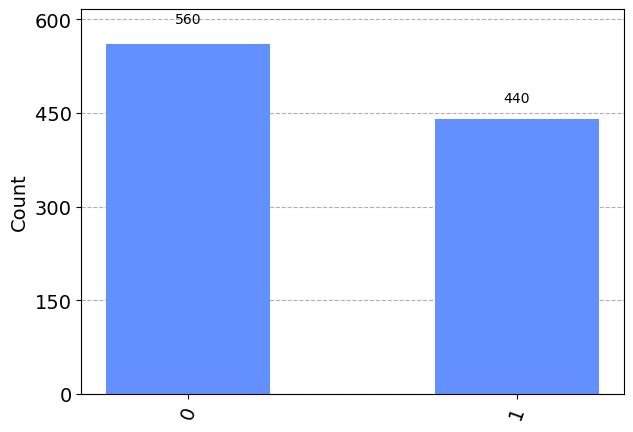

In [6]:
from qiskit.visualization import plot_histogram

statistics = v.sample_counts(1000)
display(statistics)
plot_histogram(statistics)

In [7]:
from qiskit.quantum_info import Operator
S = Operator([ [1,0],[0,1.j] ])
v = v.evolve(S)
v.draw('latex')

<IPython.core.display.Latex object>

In [8]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(1)

circuit.h(0)
circuit.t(0)
circuit.h(0)
circuit.t(0)
circuit.z(0)

circuit.draw()

┌───┐┌───┐┌───┐┌───┐┌───┐
q: ┤ H ├┤ T ├┤ H ├┤ T ├┤ Z ├
   └───┘└───┘└───┘└───┘└───┘

In [9]:
ket0 = Statevector([1,0])
v = ket0.evolve(circuit)
v.draw('latex')

<IPython.core.display.Latex object>

# Multiple systems
## classical information
Cartesian product
$$\Sigma \times \Gamma=\{(a,b) \ : a\in\Sigma \ and \ b\in \Gamma\}$$
Tensor products of vectors
$$| \psi \rangle = \sum_{a\in \sum}\alpha_a | a \rangle \ and \ | \phi \rangle = \sum_{b\in \Gamma}\beta_b | b \rangle$$
$$|\psi\rangle \otimes | \phi \rangle = \sum_{(a,b)\in \sum \times \Gamma} \alpha_a \beta_b | ab \rangle$$
$$\left(\begin{matrix}
\alpha_1 \\
\vdots \\
\alpha_m \\
\end{matrix}
\right)\otimes\left(\begin{matrix}
\beta_1 \\
\vdots \\
\beta_k \\
\end{matrix}
\right)=\left(\begin{matrix}
\alpha_1 \beta_1\\
\vdots \\
\alpha_1 \beta_k \\
\alpha_2 \beta_1 \\
\vdots \\
\alpha_2 \beta_k \\
\vdots \\
\alpha_m \beta_1 \\
\vdots \\
\alpha_m \beta_k \\
\end{matrix}
\right)$$
let $|\pi \rangle = | \psi \rangle \otimes | \phi \rangle$, there is:
$$\langle ab | \pi \rangle = \langle a| \psi \rangle \langle b| \phi \rangle$$

## measurements
measure one system X
$$Pr(X=a)=\sum_{b\in\Gamma}Pr((X,Y)=(a,b))$$
on $X=a$
$$Pr(Y=b|X=a)=\frac{Pr((X,Y)=(a,b))}{Pr(X=a)}$$
discribe in vector
$$|\phi\rangle=\sum_{(a,b)\in\Sigma\times\Gamma}p_{ab}|ab\rangle$$
$$Pr(X=a)=\sum_{b\in\Gamma}p_{ab}$$
the vector discribe X alone
$$\sum_{a\in\Sigma}(\sum_{c\in\Gamma} p_ac)|a\rangle$$
X in a, the vector of Y
$$|\pi_a\rangle=\frac{\sum_{b\in\Gamma} p_{ab}|b\rangle}{\sum_{c\in\Gamma}p_{ac}}$$

## operations
we can use matrixs to change the state of the system

## Tensor products of matrices
$$M=\sum_{a,b\in\Sigma}\alpha_{ab}|a\rangle\langle b|$$
$$N=\sum_{c,d\in\Gamma}\alpha_{cd}|c\rangle\langle d|$$
$$M\otimes N=\sum_{a,b\in\Sigma}\sum_{c,d\in\Gamma}\alpha_{ab}\beta_{cd}|ac\rangle\langle bd|$$
defined by
$$\langle ac|M\otimes N| bd\rangle=\langle a| M| b\rangle\langle c|N|d\rangle$$
$$(M\otimes N)(|\phi\rangle\otimes|\psi\rangle)=(M|\phi\rangle)\otimes(N|\psi\rangle)$$
矩阵的张量积就是M中各个元素与N中各元素相乘得一个矩阵，再将每个矩阵按M中元素的顺序组合


## quantum information
quantum states of multiple systems are represented by column vectors having complex number entries and Euclidean norm equal to 1

the measures is similar to classic

# unitary operations
作用与量子系统的矩阵是unitary的
作用于X的矩阵与作用于Y矩阵的张量积即为作用于XY系统的矩阵

## code

In [2]:
from qiskit.quantum_info import Statevector, Operator

# Tensor products
zero, one = Statevector.from_label('0'), Statevector.from_label('1')
zero.tensor(one).draw('latex')

<IPython.core.display.Latex object>

In [6]:
from numpy import sqrt
plus = Statevector.from_label('+')
i_state = Statevector([1/sqrt(2), 1j/sqrt(2)])

psi = plus.tensor(i_state)
psi.draw('latex')

<IPython.core.display.Latex object>

In [4]:
# operator
X=Operator([[0, 1], [1, 0]])
I=Operator([[1, 0], [0, 1]])
X.tensor(I)

Operator([[0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))

In [8]:
# use the operator
psi.evolve(I ^ X).draw('latex')

<IPython.core.display.Latex object>

In [9]:
CNOT = Operator([ [1, 0, 0, 0],
                 [0, 1, 0, 0],
                 [0, 0, 0, 1],
                 [0, 0, 1, 0] ])

psi.evolve(CNOT).draw('latex')

<IPython.core.display.Latex object>

In [10]:
# partial measurements
W = Statevector([0, 1, 1, 0, 1, 0, 0, 0]/sqrt(3))
W.draw('latex')

<IPython.core.display.Latex object>

In [14]:
result, new_sv = W.measure([0])  # measure qubit 0
print(f'Measured: {result}\nState after measurement:')
new_sv.draw('latex')

Measured: 0
State after measurement:


<IPython.core.display.Latex object>

# Quantum circuits

In [15]:
from qiskit import QuantumCircuit
circuit = QuantumCircuit(1)
circuit.h(0)
circuit.s(0)
circuit.t(0)
circuit.draw()

┌───┐┌───┐┌───┐
q: ┤ H ├┤ S ├┤ T ├
   └───┘└───┘└───┘

## inner products
$$\langle \psi |= (|\psi\rangle)^\dagger$$
$$\langle \psi|\phi\rangle = \langle \psi||\phi\rangle$$
## unitary matrices

1.the matrix U is unitary

2.the rows/column of U form an orthonormal set
## Projection matrices
A square matrix $\Pi$ is called a projection if it satisfies two properties:

1.$\Pi = \Pi^\dagger$
2.$\Pi^2 = \Pi$

and it could write:
$$\Pi=\sum_{k=1}^m|\psi_k\rangle\langle \psi_k | $$

# Projective measurements
$$\sum_m \Pi_m = \mathbb{1} $$
the outcome of measurement
$$Pr(outcome is k) = ||\Pi_k |\psi\rangle||^2$$
the state of X becomes
$$\frac{\Pi_k|\psi\rangle}{||\Pi_k|\psi\rangle||}$$
we use 
$$M = \sum_{k=1}^m|k\rangle\langle 1|\otimes \Pi_k$$
on Y(1 is the state we choose arbitrarily, we can replace all of the remaining zero entries by some different choice of complex number entries so that the entire matrix is unitary)
$$|k\rangle \otimes \frac{\Pi_k|\psi\rangle}{||\Pi_k|\psi\rangle||}$$

## Limitations on quantum information
we couldn't distinguish two state who differ by global phase for the probility we measure is always the same
$$|\phi\rangle = \alpha |\psi\rangle$$
$$|\langle a|\phi\rangle|^2 = |\langle a|\psi\rangle|^2$$

Let X and Y be systems sharing the same classical state set $\Sigma$ having at least two elements. There does not exist a quantum state $|\phi\rangle$ of Y and a unitary operation U on the pair (X,Y) such that
$$U(|\psi\rangle\otimes|\phi\rangle)=|\psi\rangle\otimes|\psi\rangle$$
for every state $|\psi\rangle$ of X

Non-orthogonal states cannot be perfectly discriminated

# Entanglement in action
## Teleportation
Only when Alice and Bob share an e-bit, can they accomplish this work.

cost:qubit Q be measured and the e-bit burned

### analysis
Q in state $\alpha|0\rangle + \beta |1\rangle$, e-bit:$|\phi_+\rangle$,
the whole system 
$$|\pi_0\rangle=|\phi_+\rangle \otimes(\alpha|0\rangle+\beta |1\rangle)=\frac{\alpha|000\rangle+\alpha|110\rangle+\beta|001\rangle+\beta|111\rangle}{\sqrt{2}}$$
apply C-NOT gate
$$|\pi_1\rangle=\frac{\alpha|000\rangle+\alpha|110\rangle+\beta|011\rangle+\beta|101\rangle}{\sqrt{2}}$$
apply H gate
$$|\pi_2\rangle=\frac{\alpha|00\rangle|+\rangle+\alpha|11\rangle|+\rangle+\beta|01\rangle|-\rangle+\beta|10\rangle|-\rangle}{\sqrt{2}}=\frac{\alpha|000\rangle+\alpha|001\rangle+\alpha|110\rangle+\alpha|111\rangle+\beta|010\rangle-\beta|011\rangle+\beta|100\rangle-\beta|101\rangle}{2}$$
it can be write
$$|\pi_2\rangle=\frac{1}{2}(\alpha|0\rangle+\beta|1\rangle)|00\rangle
+\frac{1}{2}(\alpha|0\rangle-\beta|1\rangle)|01\rangle 
+\frac{1}{2}(\alpha|1\rangle+\beta|0\rangle)|10\rangle 
+\frac{1}{2}(\alpha|1\rangle-\beta|0\rangle)|11\rangle $$
while it's entangled with another system, the way is the same.
### code

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.result import marginal_distribution
from qiskit.circuit.library import UGate
from numpy import pi, random

qubit = QuantumRegister(1, "Q")
ebit0 = QuantumRegister(1, "A")
ebit1 = QuantumRegister(1, "B")
a = ClassicalRegister(1, "a")
b = ClassicalRegister(1, "b")

protocol = QuantumCircuit(qubit, ebit0, ebit1, a, b)

# entangle A and B
protocol.h(ebit0)
protocol.cx(ebit0, ebit1)
protocol.barrier()

# Alice's opertions
protocol.cx(qubit, ebit0)
protocol.h(qubit)
protocol.barrier()

protocol.measure(ebit0, a)
protocol.measure(qubit, b)
protocol.barrier()

with protocol.if_test((a, 1)):
    protocol.x(ebit1)
with protocol.if_test((b, 1)):
    protocol.z(ebit1)
    
display(protocol.draw())

░      ┌───┐ ░    ┌─┐ ░                         
Q: ───────────░───■──┤ H ├─░────┤M├─░─────────────────────────
   ┌───┐      ░ ┌─┴─┐└───┘ ░ ┌─┐└╥┘ ░                         
A: ┤ H ├──■───░─┤ X ├──────░─┤M├─╫──░─────────────────────────
   └───┘┌─┴─┐ ░ └───┘      ░ └╥┘ ║  ░ ┌──────────┐┌──────────┐
B: ─────┤ X ├─░────────────░──╫──╫──░─┤0         ├┤0         ├
        └───┘ ░            ░  ║  ║  ░ │  If_else ││          │
a: ═══════════════════════════╩══╬════╡0         ╞╡          ╞
                                 ║    └──────────┘│          │
b: ══════════════════════════════╩════════════════╡0         ╞
                                                  └──────────┘

In [4]:
# give Q a state
random_gate = UGate(
    theta=random.random()*2*pi,
    phi=random.random()*2*pi,
    lam=random.random()*2*pi,
)

# create test circuit
test = QuantumCircuit(qubit, ebit0, ebit1, a, b)

test.append(random_gate, qubit)
test.barrier()

test=test.compose(protocol)
test.barrier()

# apply the inverse of random_gate, and if the result be 0,
# we achieve it
test.append(random_gate.inverse(), ebit1)

result=ClassicalRegister(1, "Result")
test.add_register(result)
test.measure(ebit1, result)

display(test.draw())

┌────────────────────────┐ ░            ░      ┌───┐ ░    ┌─┐ ░ »
     Q: ┤ U(4.889,1.9623,4.0998) ├─░────────────░───■──┤ H ├─░────┤M├─░─»
        └────────────────────────┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ ┌─┐└╥┘ ░ »
     A: ───────────────────────────░─┤ H ├──■───░─┤ X ├──────░─┤M├─╫──░─»
                                   ░ └───┘┌─┴─┐ ░ └───┘      ░ └╥┘ ║  ░ »
     B: ───────────────────────────░──────┤ X ├─░────────────░──╫──╫──░─»
                                   ░      └───┘ ░            ░  ║  ║  ░ »
     a: ════════════════════════════════════════════════════════╩══╬════»
                                                                   ║    »
     b: ═══════════════════════════════════════════════════════════╩════»
                                                                        »
Result: ════════════════════════════════════════════════════════════════»
                                                                        »
«                                 ░                                 
«     Q: ─────────────────────────░─────────────────────────────────
«                                 ░                                 
«     A: ─────────────────────────░─────────────────────────────────
«        ┌──────────┐┌──────────┐ ░ ┌───────────────────────────┐┌─┐
«     B: ┤0         ├┤0         ├─░─┤ U(-4.889,-4.0998,-1.9623) ├┤M├
«        │  If_else ││          │ ░ └───────────────────────────┘└╥┘
«     a: ╡0         ╞╡          ╞═════════════════════════════════╬═
«        └──────────┘│          │                                 ║ 
«     b: ════════════╡0         ╞═════════════════════════════════╬═
«                    └──────────┘                                 ║ 
«Result: ═════════════════════════════════════════════════════════╩═
«

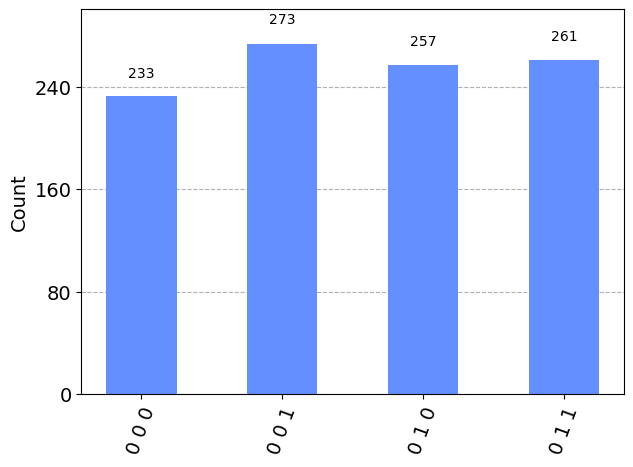

In [5]:
result=AerSimulator().run(test).result()
statistics=result.get_counts()
display(plot_histogram(statistics))

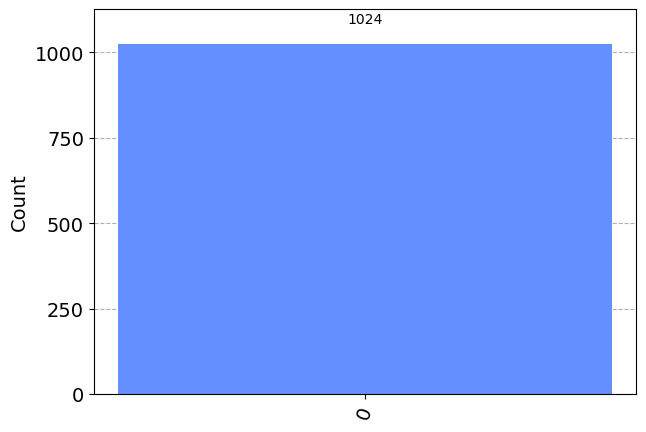

In [6]:
# filter
filtered_statistics=marginal_distribution(statistics, [2])
display(plot_histogram(filtered_statistics))